In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [6]:
data1 = pd.read_csv('ToyotaCorolla.csv', encoding = 'latin1')
data1 = pd.DataFrame(data1)

In [9]:
data1= data1.filter(["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])

In [10]:
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [11]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [12]:
data1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [13]:
data1 = data1.rename({'Age_08_04': 'age', 'Quarterly_Tax':'qt' }, axis=1)

In [14]:
data1

,Price,age,KM,HP,cc,Doors,Gears,qt,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


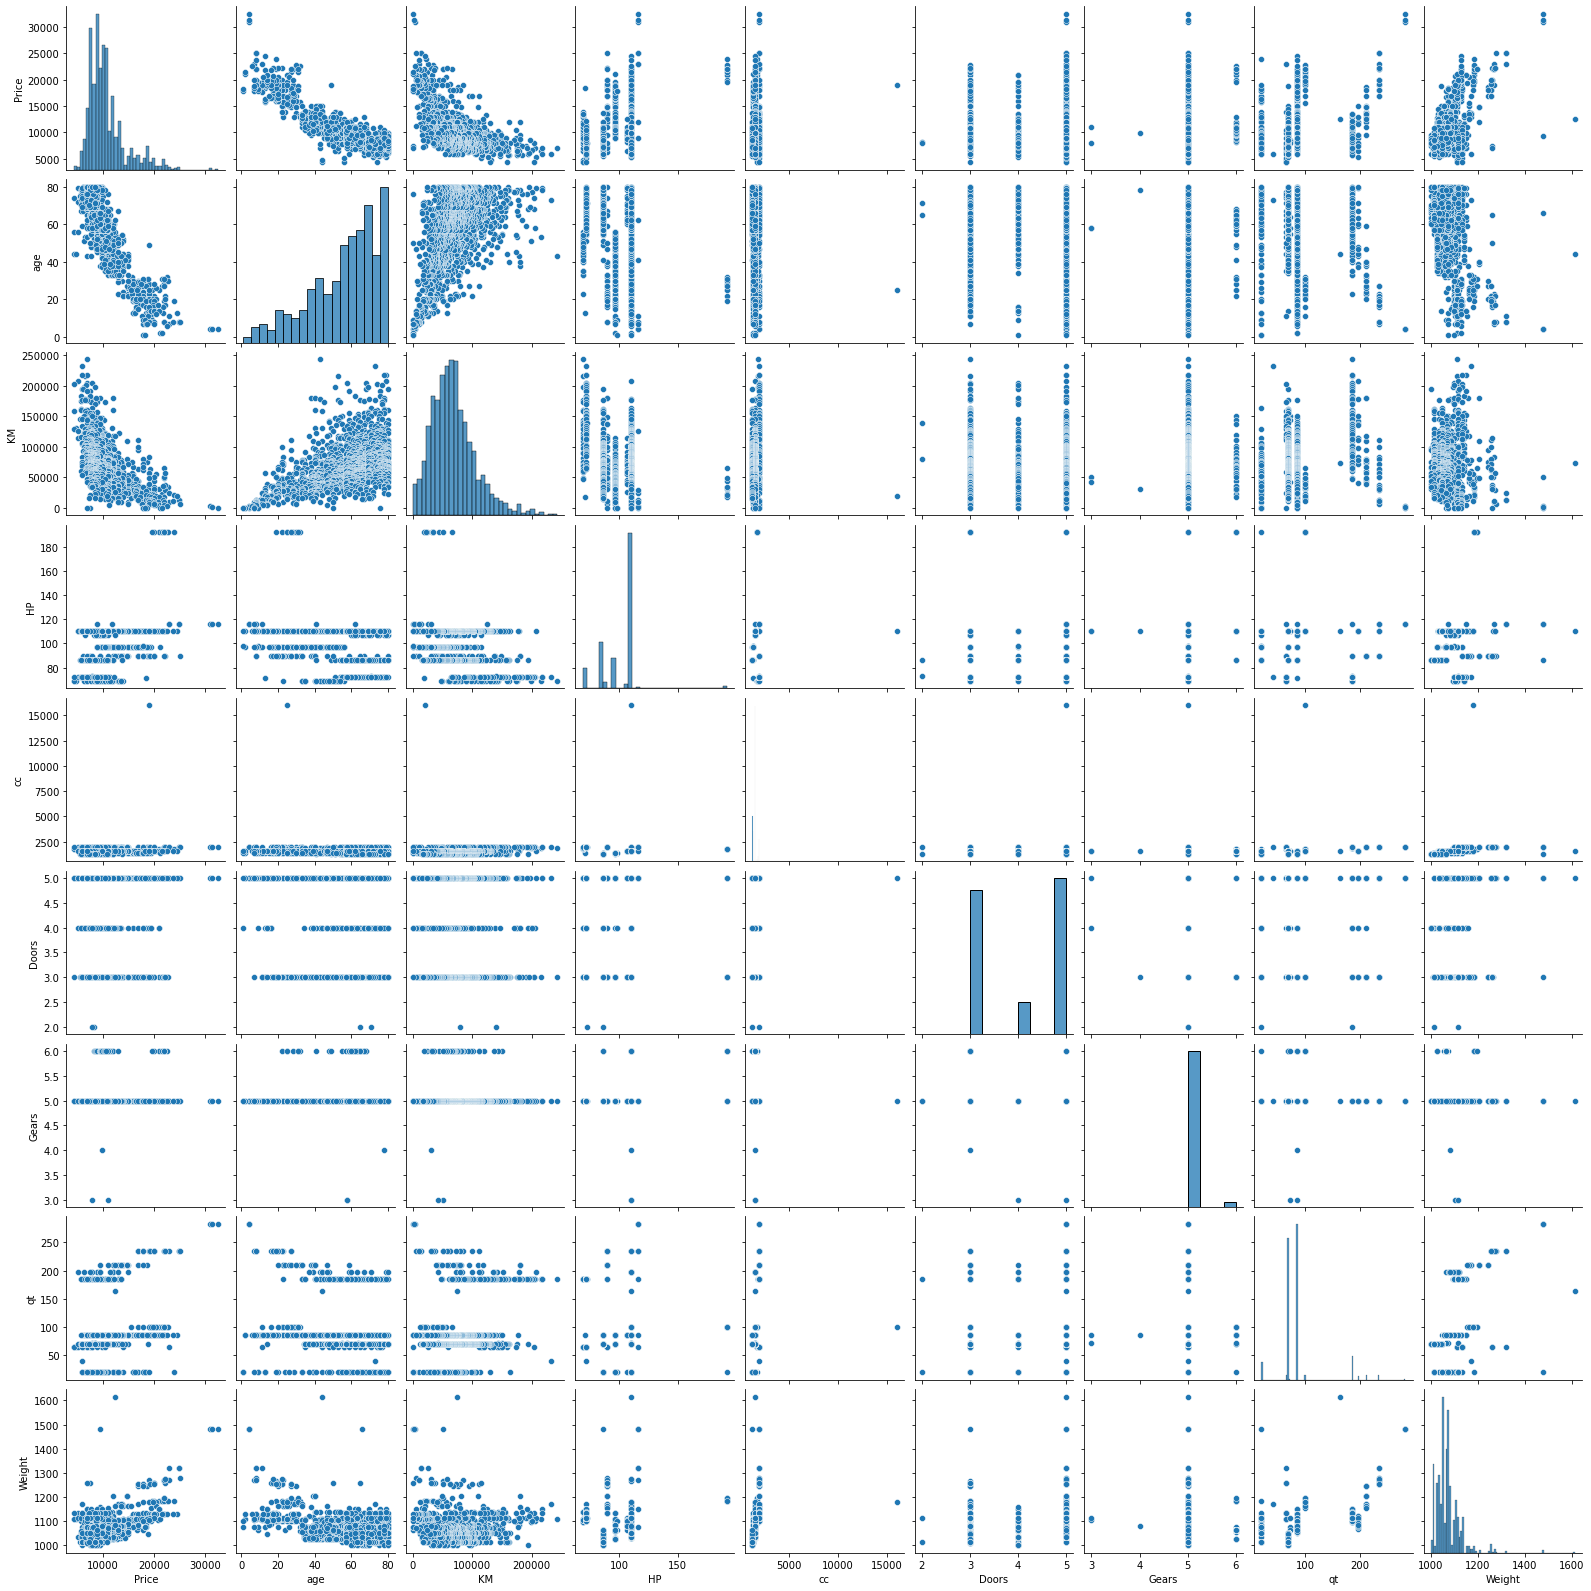

In [15]:
sns.pairplot(data1)

In [16]:
data1[data1.duplicated()]

,Price,age,KM,HP,cc,Doors,Gears,qt,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [17]:
data1 = data1.drop_duplicates()

In [18]:
data1.reset_index().drop('index',axis =1)

,Price,age,KM,HP,cc,Doors,Gears,qt,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


# Building the model

In [19]:
model = smf.ols('Price~age+KM+HP+cc+Doors+Gears+qt+Weight', data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:59:08   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
qt             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the model summary, we know, that cc and Doors are the only two insignificant variables. So, we find out if they are isignificant using simple linear regression

In [20]:
model_cc = smf.ols('Price~cc',data = data1).fit()
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           2.29e-06
Time:                        15:59:09   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model_doors = smf.ols('Price~Doors', data = data1).fit()
model_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           2.40e-12
Time:                        15:59:09   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
mode_cc_doors = smf.ols('Price~cc+Doors', data=data1).fit()
mode_cc_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           2.55e-15
Time:                        15:59:09   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So, from above two simple linear regression models we know that, both the variables are significant when considered alone each one of them. And when considered together, still they show significance. Hence there must be some multi collinearity problem in between the variable due to which, the insignifance is being shown.

In [23]:
rsq_cc= smf.ols('cc~KM+HP+age+Doors+Gears+qt+Weight', data1).fit().rsquared
vif_cc = 1/(1-rsq_cc)
rsq_Doors = smf.ols('Doors~KM+HP+cc+age+Gears+qt+Weight', data1).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

d1 = {'Variable': ['CC','Doors'], 'VIF':[vif_cc,vif_Doors]}
d1 = pd.DataFrame(d1)
d1

,Variable,VIF
0,CC,1.16347
1,Doors,1.15589


# Residual Analysis

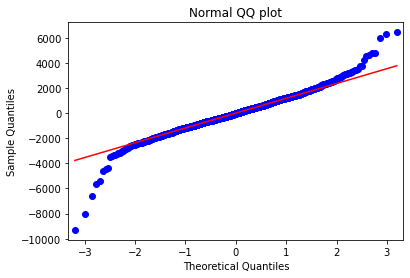

In [24]:
sm.qqplot(model.resid,line = 'q')
plt.title('Normal QQ plot')
plt.show()

In [25]:
def Standard_values(vals):
    return (vals- vals.mean())/vals.std()

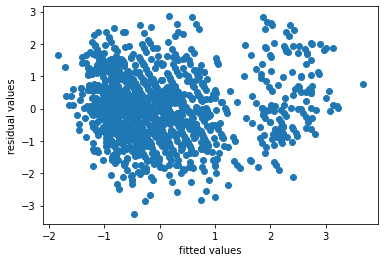

In [36]:
plt.scatter(Standard_values(model.fittedvalues), Standard_values(model.resid))
plt.xlabel('fitted values')
plt.ylabel('residual values')
plt.show()

# Finding the influencing points using cooks distance and leverage cutoff

In [27]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

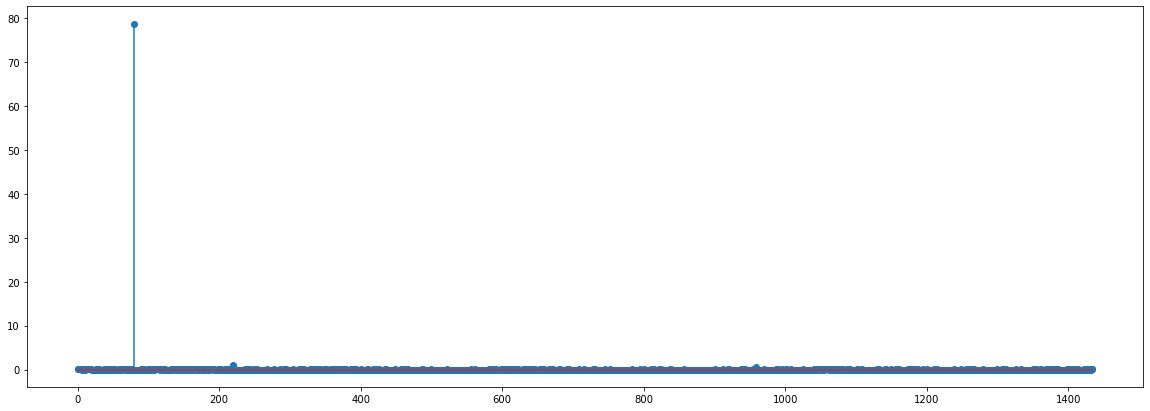

In [28]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)), np.round(c,3))
plt.show()

In [29]:
np.argmax(c),np.max(c)

(80, 78.7295058224851)

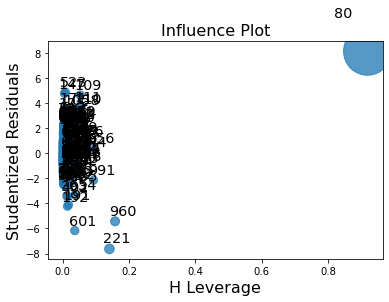

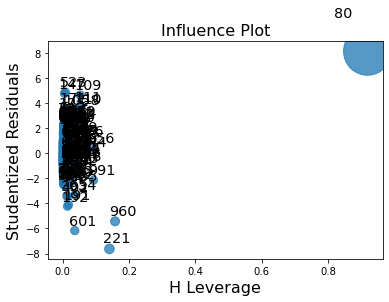

In [30]:
influence_plot(model)

In [31]:
k = data1.shape[1]
n = data1.shape[0]
leverage_cutoff = 3*(k+1)/n
leverage_cutoff

0.020905923344947737

In [32]:
data1[data1.index.isin([80])]

,Price,age,KM,HP,cc,Doors,Gears,qt,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [33]:
data1 = data1.drop(data1.index[80],axis=0)

In [34]:
data1.reset_index().drop('index',axis=1)

,Price,age,KM,HP,cc,Doors,Gears,qt,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [38]:
while model.rsquared<0.9:
    for c in [np.max(c)>1]:
        model = smf.ols('Price~age+KM+HP+cc+Doors+Gears+qt+Weight', data = data1).fit()
        (c,_) = model.get_influence().cooks_distance
        c
        np.argmax(c), np.max(c)
        data1 = data1.drop(data1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data1
    else:
        final_model = smf.ols('Price~age+KM+HP+cc+Doors+Gears+qt+Weight',data1).fit()
        final_model.rsquared, final_model.aic
    print('Thus model accuracy is improved to',final_model.rsquared)

In [41]:
pred_y = final_model.predict(data1)

In [42]:
data1['updated Price'] = pred_y

In [43]:
data1

,Price,age,KM,HP,cc,Doors,Gears,qt,Weight,updated Price
0,13750,23,72937,90,2000,3,5,210,1165,15354.362106
1,14950,26,48000,90,2000,3,5,210,1165,15415.237858
2,13750,30,38500,90,2000,3,5,210,1170,15314.008799
3,12950,32,61000,90,2000,3,5,210,1170,14749.534289
4,16900,27,94612,90,2000,3,5,210,1245,17544.273936
...,...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015,7607.457292
1326,7500,69,20544,86,1300,3,5,69,1025,9206.037539
1327,10845,72,19000,86,1300,3,5,69,1015,8535.375501
1328,8500,71,17016,86,1300,3,5,69,1015,8674.315161
